In [2]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# https://medium.com/python-data/assessing-the-riskiness-of-a-portfolio-with-python-6444c727c474

In [11]:
fondstyret = "https://www.shareville.no/api/v1/portfolios/324475/positions"
min_portefølje = "https://www.shareville.no/api/v1/portfolios/360442/positions"

raw_data = pd.read_json(fondstyret, orient="records")

raw_data = pd.concat([raw_data.drop(['instrument'], axis=1), raw_data['instrument'].apply(pd.Series)], axis=1)
raw_data = pd.concat([raw_data.drop(['acq_price_acc'], axis=1), raw_data['acq_price_acc'].apply(pd.Series)], axis=1)

raw_data.head()

,is_custom_gav,percent,updated_at,country,occurence_prc,performance_this_year,name,slug,has_fund_data,isin_code,...,comment_count,mifid2_category,underlyings,tradables,min_investment,performance_five_years,performance_three_years,rating,currency,value
0,False,8.924435,2019-06-28T14:42:53.954663Z,None,0.052,14.94,KLP AksjeUSA Indeks III,klp-aksjeusa-indeks-iii,True,NO0010768708,...,0,0,"[{'symbol': 'KLP AksjeUSA Indeks USD A', 'inst...","[{'identifier': 'F00000XM0A', 'display_order':...",100.0,NaN,NaN,NaN,NOK,1343.762325
1,False,6.711091,2019-06-28T14:56:22.228111Z,None,6.294,7.70,Nordnet Superfondet Norge,nordnet-superfondet-norge,True,SE0005993110,...,71,0,"[{'symbol': 'GJF', 'instrument_id': 16105269, ...","[{'identifier': 'F00000TH8U', 'display_order':...",100.0,40.54,44.44,4.0,NOK,139.798864
2,False,6.836185,2019-06-28T14:57:06.695678Z,None,7.846,9.31,Nordnet Superrahasto Suomi,nordnet-superrahasto-suomi,True,SE0005993102,...,83,0,"[{'symbol': 'NDA FI', 'instrument_id': 1610082...","[{'identifier': 'F00000TH8W', 'display_order':...",100.0,89.81,40.59,5.0,NOK,1553.150366
3,False,6.674422,2019-06-28T14:55:01.251799Z,None,3.456,11.89,Nordnet Superfonden Danmark,nordnet-superfonden-danmark,True,SE0005993078,...,35,0,"[{'symbol': 'ORSTED', 'instrument_id': 1655715...","[{'identifier': 'F00000TH8X', 'display_order':...",100.0,76.61,18.77,2.0,NOK,190.435629
4,False,18.240787,2019-06-28T14:34:52.875268Z,None,0.035,13.08,Handelsbanken Europafond Index (A1 NOK),handelsbanken-europafond-index-a1-nok,True,SE0006789723,...,1,0,"[{'symbol': 'AZN.UK', 'instrument_id': 1614272...","[{'identifier': 'F00000VCTO', 'display_order':...",100.0,43.63,34.81,3.0,NOK,107.299603


In [12]:
raw_data.columns

Index(['is_custom_gav', 'percent', 'updated_at', 'country', 'occurence_prc',
       'performance_this_year', 'name', 'slug', 'has_fund_data', 'isin_code',
       'price_type', 'has_ucits', 'currency', 'is_daily_traded',
       'pawn_percentage', 'status', 'stream_count', 'sector_group',
       'prospectus_url', 'sell_fee', 'symbol', 'instrument_id',
       'performance_one_week', 'category', 'sector', 'multiplier',
       'performance_one_month', 'id', 'institute', 'buy_fee',
       'instrument_type', 'last_nav_date', 'last_nav', 'no_of_decimals',
       'instrument_group_type', 'org_info', 'performance_one_day',
       'management_fee', 'stream_count_1d', 'comment_count', 'mifid2_category',
       'underlyings', 'tradables', 'min_investment', 'performance_five_years',
       'performance_three_years', 'rating', 'currency', 'value'],
      dtype='object')

In [13]:
key_data = raw_data[["name", "symbol", "percent", "management_fee", "performance_one_week", "performance_this_year", "performance_three_years", "performance_five_years"]]
key_data

,name,symbol,percent,management_fee,performance_one_week,performance_this_year,performance_three_years,performance_five_years
0,KLP AksjeUSA Indeks III,F00000XM0A,8.924435,0.20,-3.24,14.94,NaN,NaN
1,Nordnet Superfondet Norge,F00000TH8U,6.711091,0.00,-0.35,7.70,44.44,40.54
2,Nordnet Superrahasto Suomi,F00000TH8W,6.836185,0.00,-0.94,9.31,40.59,89.81
3,Nordnet Superfonden Danmark,F00000TH8X,6.674422,0.00,-2.80,11.89,18.77,76.61
4,Handelsbanken Europafond Index (A1 NOK),F00000VCTO,18.240787,0.20,-1.13,13.08,34.81,43.63
5,KLP AksjeFremvoksende Markeder Indeks II,F00000MKDH,18.473491,0.30,-1.55,7.93,39.35,53.42
6,KLP AksjeGlobal LavBeta I,F00000RW2R,17.762592,0.27,-3.16,11.41,30.17,82.37
7,Nordnet Superfonden Sverige,F000002J6V,7.009371,0.00,-0.49,10.98,26.39,54.45


In [14]:
startdate = '2017-01-01'

data = []

# Morningstar loop to get historical prices         
for index, row in key_data.iterrows():
    payload = {"id": row["symbol"], "currencyId": "NOK", "idtype": "Morningstar", "frequency": "daily", "startDate": startdate, "outputType": "COMPACTJSON"}
    data = requests.get("http://tools.morningstar.no/api/rest.svc/timeseries_price/nen6ere626", params=payload)
    result = data.text
    jsondecode = json.loads(result)
    
    if index == 0:
        df = pd.DataFrame(jsondecode, columns=["Timestamp", row["name"]])
        df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='ms')
    else:
        temp = pd.DataFrame(jsondecode, columns=["Timestamp", row["name"]])
        df[row["name"]] = temp[row["name"]]
  

In [15]:
df.describe()

,KLP AksjeUSA Indeks III,Nordnet Superfondet Norge,Nordnet Superrahasto Suomi,Nordnet Superfonden Danmark,Handelsbanken Europafond Index (A1 NOK),KLP AksjeFremvoksende Markeder Indeks II,KLP AksjeGlobal LavBeta I,Nordnet Superfonden Sverige
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1246.030133,128.453150,1470.957405,189.204622,106.745838,1819.883565,1799.078555,325.418733
std,108.269416,13.005687,117.859710,10.490461,4.958740,116.274057,104.841665,14.582945
min,1059.915000,105.610000,1174.504000,160.503000,93.330000,1522.714000,1599.222000,286.275000
25%,1151.566000,114.640000,1422.519000,182.785750,103.750000,1748.439250,1717.601250,316.435750
50%,1243.722000,130.035000,1473.204500,192.340000,107.905000,1830.196500,1779.034500,327.181500
75%,1327.851000,139.655000,1571.948000,196.429250,110.197500,1913.182250,1860.321250,336.644500
max,1480.413000,152.490000,1685.096000,206.449000,116.500000,2036.164000,2070.832000,357.834000


In [43]:
df_without_timestamp = df.drop("Timestamp", axis=1)
 

weekly_returns = df_without_timestamp.pct_change(5)  
daily_returns = df_without_timestamp.pct_change(1)  


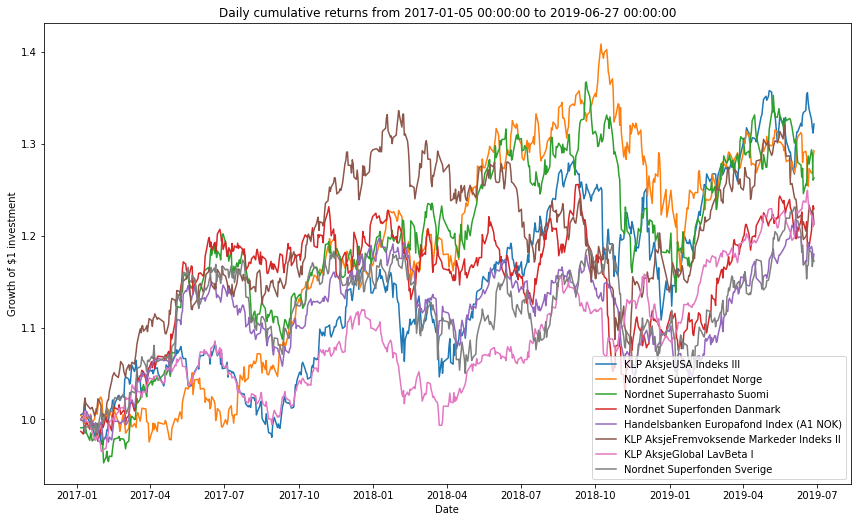

In [50]:


fig = plt.figure(figsize=(14,8))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
for column in daily_returns.columns:
    if column != "Timestamp":
        plt.plot(df["Timestamp"], (daily_returns[column] + 1).cumprod(), label=column)
        
    
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Daily cumulative returns from " + str(df["Timestamp"].iloc[0]) + " to " + str(df["Timestamp"].iloc[-14]))
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Corrolation matrix of Assets')

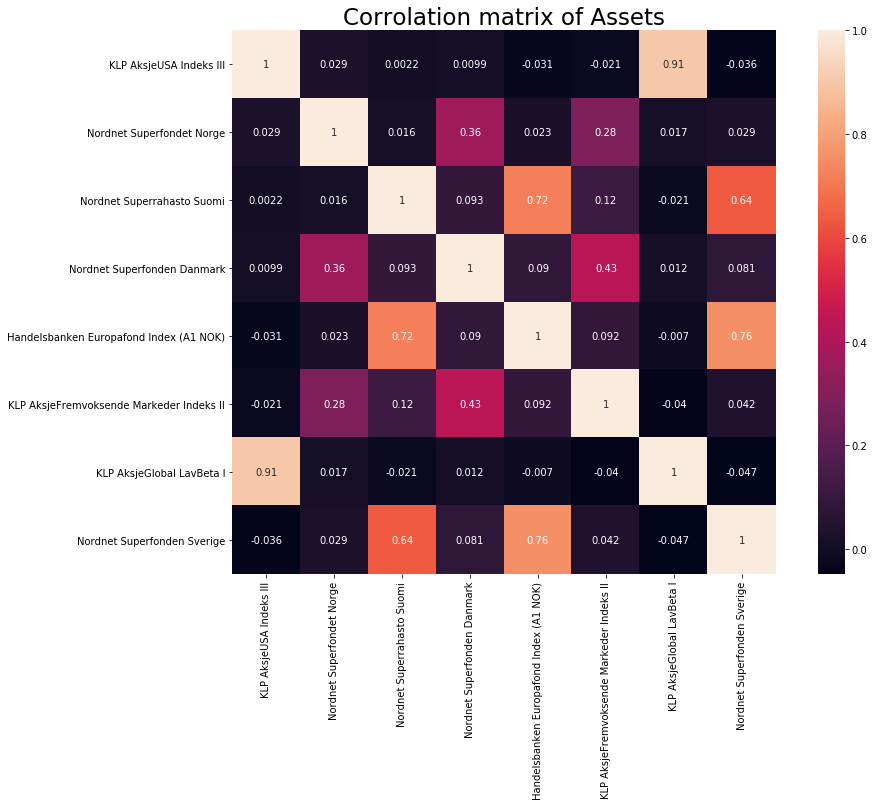

In [25]:
#corr_matrix = df.drop("Timestamp", axis=1).corr()
corr_matrix = daily_returns.corr()

figure, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, vmax=1.0, annot=True, square=True)
plt.title('Corrolation matrix of Assets', fontsize=23)

In [14]:
# https://medium.com/python-data/assessing-the-riskiness-of-a-portfolio-with-python-6444c727c474

# drop timestamp

df_calc = df.drop("Timestamp", axis=1)
 

d_returns = df_calc.pct_change()  

cov_matrix_d = d_returns.cov()
cov_matrix_a = cov_matrix_d * 250

weights = np.array(key_data.percent * 0.01)

# calculate the variance and risk of the portfolo
port_variance = np.dot(weights.T, np.dot(cov_matrix_a, weights))
port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_a, weights)))

percent_var = str(round(port_variance, 4) * 100) + '%'
percent_vols = str(round(port_volatility, 4) * 100) + '%'

print('Variance of Portfolio is {}, Portfolio Risk is {}'.format(percent_var, percent_vols))

Variance of Portfolio is 0.69%, Portfolio Risk is 8.290000000000001%
